# Running Models

## Load libraries and dataframes

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
#Pickle in the main dataframe with all features + target
c_df = pd.read_pickle('./c_df_dummies.pkl')
c_df = c_df.reset_index(drop=True)

### Last take at our dataframe information

In [3]:
example = pd.read_pickle('./c_df.pkl')
example.head()

,average_price,highest_price,lowest_price,performer_genre,ticket_listing_count,venue_city,event_month,event_day,event_start,time_of_day,wkend_wkday,venue_capacity,venue_score
0,337.0,584.0,253.0,rock,4.0,Brooklyn,02,Fri,19,evening,weekend,small,0.431162
1,337.0,584.0,253.0,electronic,4.0,New York,02,Fri,19,evening,weekend,small,0.455722
2,22.0,24.0,20.0,rock,3.0,Port Chester,02,Fri,20,evening,weekend,large_venue,0.636922
3,45.0,80.0,30.0,pop,4.0,Westbury,02,Fri,20,evening,weekend,large_venue,0.501232
4,92.0,120.0,71.0,alternative,10.0,New York,02,Fri,20,evening,weekend,XL_venue,0.681791


In [4]:
print('Shape')
print(example.shape)

example.info()
# 1254 usable data points

Shape
(1254, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1280
Data columns (total 13 columns):
average_price           1254 non-null float64
highest_price           1254 non-null float64
lowest_price            1254 non-null float64
performer_genre         1254 non-null object
ticket_listing_count    1254 non-null float64
venue_city              1254 non-null object
event_month             1254 non-null object
event_day               1254 non-null object
event_start             1254 non-null int64
time_of_day             1254 non-null object
wkend_wkday             1254 non-null object
venue_capacity          1254 non-null object
venue_score             1254 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 137.2+ KB


In [5]:
example.describe()

,average_price,highest_price,lowest_price,ticket_listing_count,event_start,venue_score
count,1254.000000,1254.00000,1254.000000,1254.000000,1254.000000,1254.000000
mean,201.563397,943.37575,90.129984,159.892344,19.432217,0.507202
std,131.039167,1476.70055,68.841037,381.968604,1.508618,0.205611
min,22.000000,24.00000,4.000000,3.000000,12.000000,0.000000
25%,121.000000,584.00000,53.000000,11.000000,19.000000,0.455722
50%,168.000000,584.00000,72.000000,37.000000,20.000000,0.527452
75%,242.000000,584.00000,97.750000,110.000000,20.000000,0.607921
max,1760.000000,14207.00000,1321.000000,4684.000000,23.000000,0.886954


## Testing models with different pricing features

### Description of model without lowest or highest price feature

<font color=blue><br>
- R^2 .300
- Adj. R^2 .272
- Not as well as it could be. Results are too unrelated.</font>
<br>

In [6]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'lowest_price', 'highest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
# model.summary()

### Description of model without lowest price feature

<font color=blue><br>
- R^2 = **.501**
- Adj. R^2 = **.482**
- Better than without lowest and highest feature.</font>
<br>

In [7]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'lowest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
# model.summary()

### Description of model without highest price feature

<font color=blue><br>
- R^2 = **.619**
- Adj. R^2 = **.604**
- Better than without highest feature.</font>
<br>

In [8]:
## outcome = 'average_price'
predictors = c_df.drop(columns=['average_price', 'highest_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
# model.summary()

### Description of model with all features

*Best fit so far in terms of using the R^2 score*
<font color=blue><br>
- R^2 = **.771**
- Adj. R^2 = **.762**
</font>
<br>

In [9]:
outcome = 'average_price'
predictors = c_df.drop(columns=['average_price'])
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
predictors_int = sm.add_constant(predictors)
model = sm.OLS(c_df['average_price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     85.21
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          4.45e-307
Time:                        16:35:44   Log-Likelihood:                -6199.6
No. Observations:                1107   AIC:                         1.249e+04
Df Residuals:                    1064   BIC:                         1.270e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
highest_price                   0.0423      0.002     26.580      0.000       0.039       0.045
lowest_price                    1.0601      0.030     35.369      0.000       1.001       1.119
ticket_listing_count           -0.0220      0.007     -3.012      0.003      -0.036      -0.008
venue_score                   220.2023     39.462      5.580      0.000     142.770     297.635
performer_genre_alternative   -11.6248      8.285     -1.403      0.161     -27.882       4.633
performer_genre_blues           1.0555      8.692      0.121      0.903     -16.000      18.111
performer_genre_country        -5.1307      6.519     -0.787      0.431     -17.923       7.662
performer_genre_electronic     -9.5104     11.823     -0.804      0.421     -32.709      13.688
performer_genre_hip-hop        -3.8054     10.471     -0.363      0.716     -24.351      16.740
performer_genre_latin          14.4062     16.761      0.860      0.390     -18.481      47.294
performer_genre_pop            -3.7905      4.467     -0.849      0.396     -12.556       4.975
performer_genre_rock            8.2514      7.263      1.136      0.256      -5.999      22.502
performer_genre_soul           -4.2573     12.422     -0.343      0.732     -28.632      20.117
event_month_02                -26.1283      9.216     -2.835      0.005     -44.211      -8.046
event_month_03                -11.7433      8.946     -1.313      0.190     -29.297       5.810
event_month_04                -24.0294      9.370     -2.565      0.010     -42.414      -5.645
event_month_05                -17.8730      9.967     -1.793      0.073     -37.431       1.685
event_month_06                -14.0838     10.865     -1.296      0.195     -35.403       7.235
event_month_07                 22.2083     13.808      1.608      0.108      -4.886      49.303
event_month_08                 29.1114     13.046      2.231      0.026       3.513      54.710
event_month_09                 -9.4188     15.673     -0.601      0.548     -40.173      21.335
event_month_10                -75.1751     24.554     -3.062      0.002    -123.355     -26.995
event_month_11                151.4444     62.791      2.412      0.016      28.237     274.652
event_month_12                -38.7183     44.142     -0.877      0.381    -125.335      47.898
event_day_Fri                  -4.0669      4.572     -0.890      0.374     -13.038       4.904
event_day_Mon                  -0.6876      7.688     -0.089      0.929     -15.773      14.398
event_day_Sat                  -6.8501      4.452     -1.539      0.124     -15.586       1.886
event_day_Sun                 -11.6179      5.948     -1.953      0.051     -23.290       0.054
event_day_Thu                  -6.3511      4.991     -1.272      0.204     -16.145       3.443
event_day_T

In [10]:
model.predict()[1:10]

array([361.85088413, 103.84562713,  60.21503335, 144.46494026,
       177.70332058, 172.99316622,  89.20678186,  55.72510409,
       143.02408078])

In [20]:
model.score(X,y)

0.7668312387685927

Findings: 
- Smaller venues have a stronger impact on the ticket price than large, XL and medium since these 3 are reduce price 
- Tuesday and Wednesday events yield a better price
- Events starting from 5 until 7 yield better prices than other times. At 10 o clock, events raise in price by \\$ 25
- November is a good month

### Sci-Kit Learn Metrics and Coefficient Values

In [25]:
# include all features
X = c_df[feature_cols]
y = c_df.average_price

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

# Instantiate model
model = LinearRegression()

# Fit Model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# RMSE
print(f'R^2: {model.score(X_train, y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'stddev: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.7873146184572155
MAE: 41.01348258241605
MSE: 4163.458788601898
RMSE: 64.52486953572163
stddev: 0.6207767916424267


RMSE is interpretable to the y units. We are on average off by $64.

In [28]:
weights = model.coef_
variables = predictors.columns
variable_dict = {w[0]:w[1] for w in zip(weights, variables)}
sorted(variable_dict.items())

[(-73.1672376341062, 'event_month_10'),
 (-27.891790821756484, 'event_month_04'),
 (-26.504251395701345, 'event_month_02'),
 (-24.615549592189478, 'event_start_23'),
 (-21.235706116721992, 'venue_capacity_large_venue'),
 (-19.275013788232847, 'event_month_05'),
 (-16.88121417800463, 'event_month_06'),
 (-15.49846787994184, 'event_start_14'),
 (-14.985493413981182, 'event_month_09'),
 (-13.811691129157548, 'venue_region_new york city'),
 (-13.666751788268773, 'venue_capacity_medium_'),
 (-12.662175717043958, 'performer_genre_alternative'),
 (-12.528375896241887, 'event_start_15'),
 (-11.910027612896094, 'event_start_21'),
 (-11.14580554117306, 'event_day_Sun'),
 (-10.836910439967482, 'event_month_03'),
 (-9.428882838789534, 'performer_genre_electronic'),
 (-7.331045593838432, 'event_start_20'),
 (-6.852151864988457, 'performer_genre_country'),
 (-4.111957290045382, 'performer_genre_hip-hop'),
 (-3.838866941642909, 'time_of_day_afternoon'),
 (-3.0570276502618796, 'venue_capacity_XL_venue

Findings:<br>
- The month of November has the greatest impact on the price, with the event coefficient 144 while the next highest month is at 28.
- Venue score is the highest coefficient but the value is between 0 and 1. In other words, price for venue score increase by 2.1 per .01. 
- Small capacity venues, events starting at 5 or 10, and events in August yield higher values.
- Events starting at 11, in a large venue, in October, yield exceptionally low prices.

/Users/chrischung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


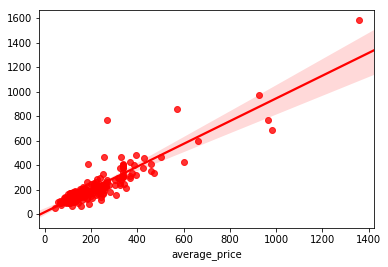

In [14]:
# Make a residual plot to visualize our models fit to the actual v. predicted data
sns.regplot(y_test, y_pred, color="r");